In [5]:
!pip install pandas
!pip install numpy

In [13]:
import pandas as pd
import numpy as np

### load dataset
df = pd.read_csv('train.csv')

print("Dataset Shape:", df.shape) # quick shape review

Dataset Shape: (1460, 81)


In [3]:
# handle missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percentage = (missing/len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percentage})
missing_df.head(15)

,Missing Values,Percentage (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [19]:
# drop columns w >80% missing values
drop_cols = [col for col in df.columns if df[col].isnull().mean() > 0.8]
df.drop(columns=drop_cols, inplace=True)
# fill numerical nan w med
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# fill categorical nan w 'None'
cal_cols = df.select_dtypes(include=['object']).columns
df[cal_cols] = df[cal_cols].fillna('None')

In [21]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype('category')
df['OverallQual'] = df['OverallQual'].astype('category')

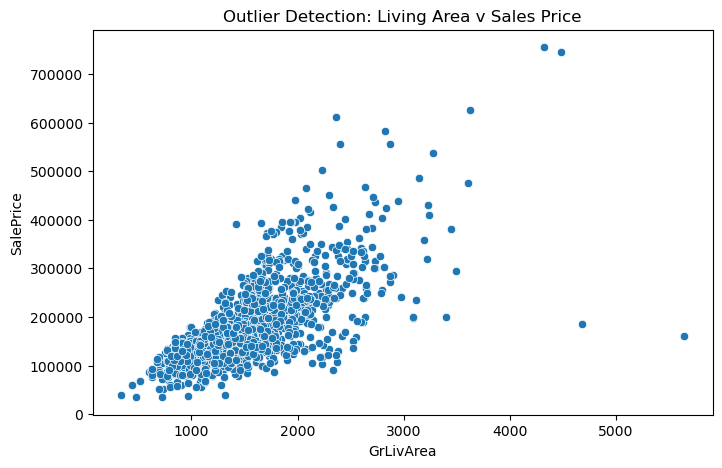

In [27]:
# detect & handle outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Outlier Detection: Living Area v Sales Price")
plt.show()

df = df[df['GrLivArea'] < 4000] # remove extreme outlier

In [29]:
df.to_csv('Housing Market Analysis/clean_data.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!


### Phase 2 Summary - Data Cleaning &  Preprocessing
- Dropped 5 columns w >80% missing values
- Imputed missing numeric values using median
- Filled missing categorical data w 'None'
- Converted selected columns to correct data types
- Removed extreme outliers (GrLivArea > 4000)
- Saved cleaned dataset for analysis in Phase 3